# Clusterization

## 1. Texts Segmentation

In [1]:
from clusterization import text_segmentation
path = "../../../Texts/text2_3.txt" 
handle = open(path, 'r')
text = handle.read()
handle.close()
new = text_segmentation(text)
new[:3]

[[(0,
   ' А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное.'),
  (0, ' Ведь подержанный автомобиль – это всегда «кот в мешке».'),
  (1,
   ' Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную».'),
  (1,
   ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.')],
 [[(0, ''),
   (1, ' Грамотно составляйте запрос поиска\n'),
   (1,
    'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег.')]],
 [(0, ' Если нужен седан, значит, выбираете только седан.'),
  (0,
   ' Если нужна механическая коробка, в условиях поиска ставите «только МКП».'),
  (1,
   ' В идеале, конечно, к моменту составления запроса нужно четко представлять, автомобиль какой марки и модели предполагается к покупке.'),
  (0,
   ' Нужен Рено Логан, значит, смотр

## 2. Experiments With Semantic

In [2]:
import os
import numpy as np
import time
import pickle
from scipy.linalg import block_diag


In [3]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../../model.bin', binary=True) 
model.init_sims(replace=True)

/home/ased/anaconda3/lib/python3.5/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### 2.1. Trivial Segmentation

In [4]:
import pickle
with open('data_dict.pickle', 'rb') as f:
    data_dict = pickle.load(f)
    f.close()

In [5]:
from clusterization import trivial_segmentation
list_texts, TT, list_tag_ud = trivial_segmentation(path, model,data_dict)

/home/ased/Desktop/PROJECTS/SearchScript/SemanticAnalysis/Experiments/TextsClusters/clusterization.py:91: RuntimeWarning: invalid value encountered in true_divide
  return s/k


In [6]:
for i in list_texts:
    print(i, '\n')

 А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное. Ведь подержанный автомобиль – это всегда «кот в мешке». Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную». 

 Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным. 

 Грамотно составляйте запрос поиска
 

Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег. 

 Если нужен седан, значит, выбираете только седан. 

 Если нужна механическая коробка, в условиях поиска ставите «только МКП». 

 В идеале, конечно, к моменту составления запроса нужно четко представлять, автомобиль какой марки и модели предполагается к покупке. Нужен Рено Логан, значит, смотрим Рено Логан, а не Clio Symbol, Sandero и Polo Sedan до кучи. 

 Имейте в виду, что даже самый «замечательный» б/у автомобиль п

### 2.2. Union Of Segments

You can see that each segment is linked by one sence and has not some excess sentences. But there are segmentes that should be united. An example of such pairs is the pair of the first and second segments. It is one script step that can be named 'Request Generation'.

In [12]:
D = [(np.linalg.norm(i - TT[ind+1]), list_texts[ind], list_texts[ind+1]) for ind, i in enumerate(TT[:-1])]
D

[(0.39145511719774523,
  ' А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное. Ведь подержанный автомобиль – это всегда «кот в мешке». Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную».',
  ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.'),
 (0.5216020129300578,
  ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.',
  ' Грамотно составляйте запрос поиска\n'),
 (0.49975429724579123,
  ' Грамотно составляйте запрос поиска\n',
  'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег.'),
 (0.5197614053842909,
  'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется д

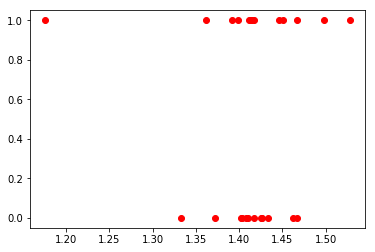

In [20]:
marks =[1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,0,0,1,1, ]
x = [i[0] for i in D]
for ind, i in enumerate(x):
    if np.isnan([i]).any():
        x[ind] = max(x)
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(x, marks, 'ro')

In such classification we can see that there is some spread of classes on segment [0.45,0.60]. The optimal bound is equal to 0.455.